In [2]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_arm64.whl (22.4 MB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer

In [4]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


,SNo,High,Low,Open,Close,Volume,Marketcap
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03
mean,1437.042754,2443.242526,2297.695559,2374.203672,2378.117650,4.297519e+09,4.351512e+10
std,835.835690,7603.848963,7109.136298,7375.720130,7383.372253,1.224228e+10,1.367798e+11
min,1.000000,0.251757,0.212967,0.220121,0.223522,0.000000e+00,1.279606e+06
25%,716.000000,9.812452,8.873865,9.349090,9.392102,3.418658e+06,2.134455e+08
50%,1431.000000,91.571416,85.498041,88.624752,88.675180,7.130490e+07,2.851460e+09
75%,2146.250000,469.253494,448.991257,458.386986,458.922989,2.058342e+09,9.183906e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


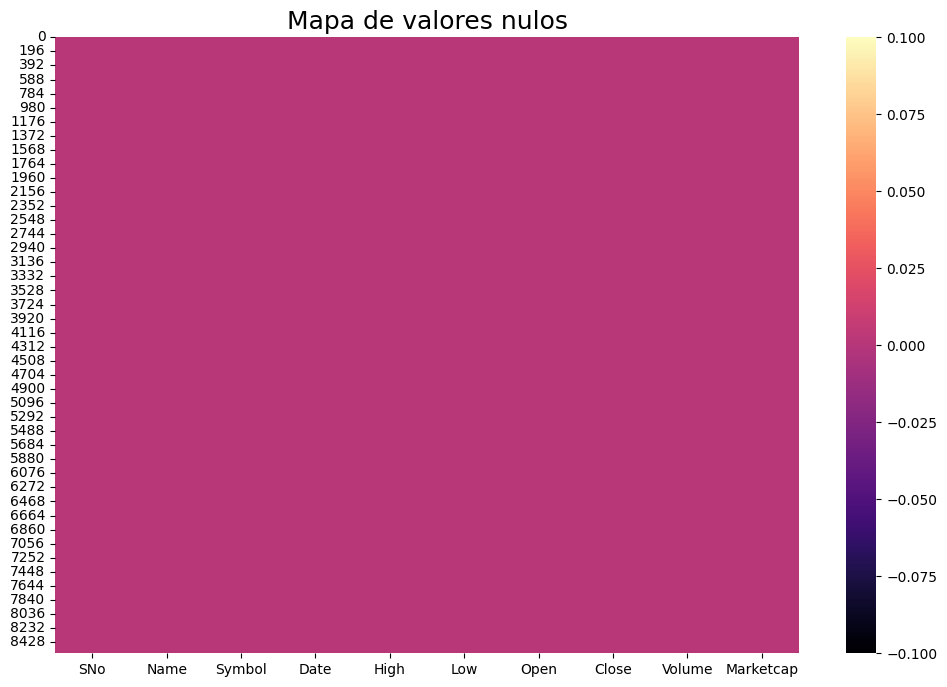

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='magma', cbar=True)
plt.title('Mapa de valores nulos', fontsize=18)
plt.show()



--- Modelo para Bitcoin ---
MSE: 33920.62
R2 Score: 1.00


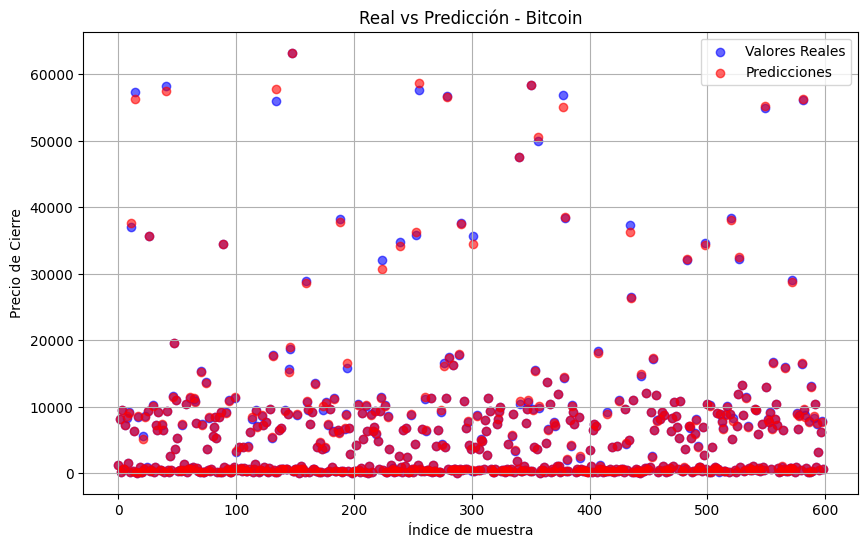


--- Modelo para Litecoin ---
MSE: 2.92
R2 Score: 1.00


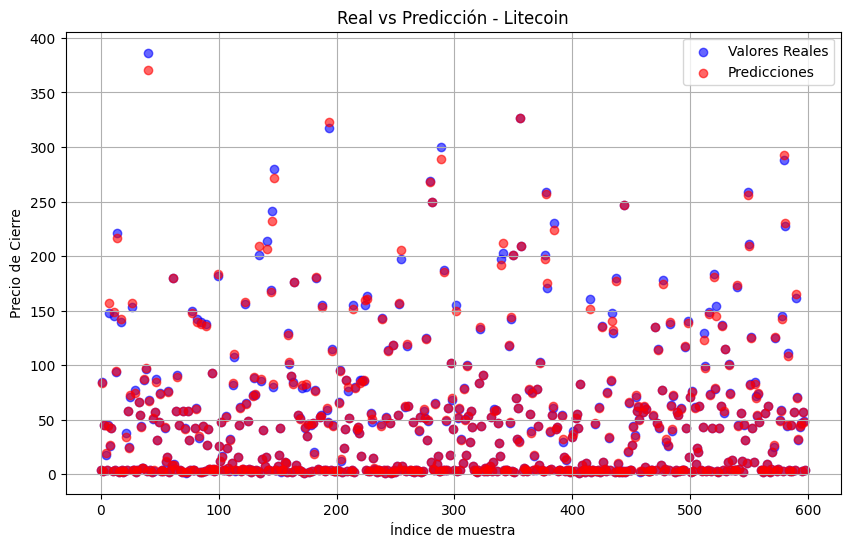


--- Modelo para Monero ---
MSE: 21.34
R2 Score: 1.00


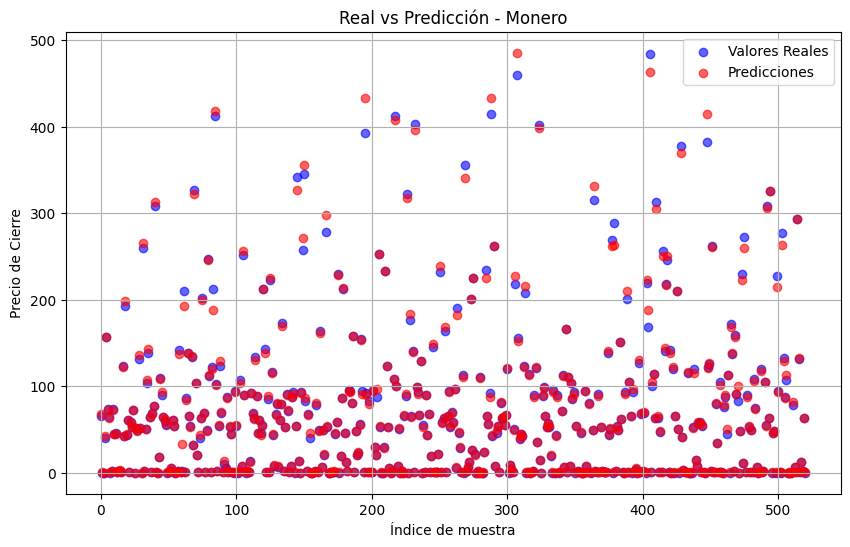

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Lista de criptomonedas
cryptos = df['Name'].unique()

# Recorrer cada cripto
for crypto in cryptos:
    print(f"\n--- Modelo para {crypto} ---")

    # Filtrar datos de la cripto
    df_crypto = df[df['Name'] == crypto]

    # Features y target
    X = df_crypto[['Open', 'High', 'Low', 'Volume']]  # Puedes ajustar las columnas que quieras usar
    y = df_crypto['Close']

    # Escalar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir en train/test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Crear modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir
    y_pred = model.predict(X_test)

    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

    # Graficar real vs predicción
    plt.figure(figsize=(10,6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Valores Reales', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicciones', alpha=0.6)
    plt.title(f'Real vs Predicción - {crypto}')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.grid(True)
    plt.show()
